In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-23.164900908185444 164.73311108850703
-42.18925162090129 72.5110387183438
-6.480217233851917 142.91738390374064
-12.307819843367412 0.4912191628765754
43.63314011225373 40.82032973492787
-11.437179381519627 -6.502355808324069
46.685189380516704 28.210848673772063
86.31459582100257 84.2927455574104
27.571196345405028 24.259786254714555
58.94476113743434 80.72632616259659
48.13421676674017 41.755263137066265
-24.38915821327589 -104.96890297369312
12.901021786680019 83.56121194010092
14.585740006227468 112.21281481813554
83.07490676720082 -88.80765933457212
-36.22174167916183 30.095835900890336
8.603761198973785 -105.46922986883527
-49.67128417748075 -81.89708170874053
53.06788083472986 4.020610538167546
-78.0205335825513 -178.17429345408337
-18.19029388511872 -104.34070512232479
13.56679934998894 98.15045121816985
-83.26338508373308 117.99209621652301
83.33546815075098 -149.41788504193718
36.251055167579125 151.12307422045973
35.0389886568358 -152.82892535401035
-84.91659205704921 32.10

53.75061262975572 128.31595517878338
-31.02185149457344 -137.93607539775556
11.936876711637979 -145.04076892122796
56.12564948420254 126.68032016804506
-7.159398451118491 73.77560667404597
15.437400871440431 141.6286876113209
-52.68708001508038 12.713164113512818
61.1814324593949 57.97606744933702
39.19624965537642 97.68114861791219
30.981819851603234 -30.197234855136173
20.130980508158885 -126.13296994669982
33.763358818259576 -122.0612734347815
-1.7503424444576012 88.53431687102011
31.84828758537145 105.47670099833056
10.133296500670568 -85.67381947000617
9.752616409539854 156.65410843094344
-72.64513472863996 -46.07675388399835
75.68204529698966 -67.66033627832483
74.98238562388704 -171.13406952132044
-50.673630634841544 -56.18428804879822
36.252016987611086 -39.11204151355608
-54.770225159970785 22.882579873419218
-87.10735268410185 -21.621044902671287
-40.10267064222069 102.677103496141
-33.84558540744798 -158.61255594384804
12.338588717361972 -45.61120419360816
-0.355020817472635

41.67257361385052 146.38405823910796
-30.4221486024817 118.9866096759095
2.1683505806444288 -22.746860366660115
18.34376004248523 -42.203965030789135
-73.17854343405318 59.70677971438616
-22.459099924043826 156.68842928963085
-74.16053666828596 -119.94538355160317
-51.57882255916035 61.72138637064134
33.154583206884595 -109.02562268331721
-29.854038721036396 151.29855683338502
-19.591429469552907 -86.78994893122315
42.93688600014545 -143.08384597667447
85.19797239639024 73.57126344872765
-64.93041128620189 -21.89787159880882
-85.88410236890725 -119.13864569910814
-29.823376515148595 110.97175972121545
48.492609209523636 -62.65670316836466
-87.89428709522666 88.42977995801198
-71.61493916216159 113.41067403746882
41.46595035454018 -77.80766768588155
34.51397530013193 -22.540860921522295
-86.13276153262011 -108.1771418991367
66.70188593850085 164.05922316193852
-38.446056268787 -105.45826732587538
-75.71553237613068 139.79497389547402
9.175450536416193 28.613548694342
25.48576114937606 1

In [5]:
# Import CityPy module
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | moindou
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | tari
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | kurdzhinovo
Processing Record 6 of Set 1 | stanilesti
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | jalu
Processing Record 9 of Set 1 | kargasok
Processing Record 10 of Set 1 | morozovsk
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | kattivakkam
Processing Record 13 of Set 1 | qui nhon
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | ixtapa
Processing Record 17 of Set 1 | coihaique
Processing Record 18 of Set 1 | den helder
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | dawei
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 | nemuro
Processing 

Processing Record 40 of Set 4 | jojoima
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | veletma
City not found. Skipping...
Processing Record 44 of Set 4 | siddipet
Processing Record 45 of Set 4 | puerto colombia
Processing Record 46 of Set 4 | xai-xai
Processing Record 47 of Set 4 | noumea
Processing Record 48 of Set 4 | ishurdi
Processing Record 49 of Set 4 | lakhnau
Processing Record 50 of Set 4 | west bay
Processing Record 1 of Set 5 | drumheller
Processing Record 2 of Set 5 | amaraji
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | comodoro rivadavia
Processing Record 6 of Set 5 | helong
Processing Record 7 of Set 5 | alekseyevka
Processing Record 8 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 9 of Set 5 | nanning
Processing Record 10 of Set 5 | senno
Processing Record 11 of Set 5 | matamoros
Processing Record 12 of Set 5 | pevek
P

Processing Record 25 of Set 8 | pangnirtung
Processing Record 26 of Set 8 | surat
Processing Record 27 of Set 8 | majene
Processing Record 28 of Set 8 | fare
Processing Record 29 of Set 8 | zeya
Processing Record 30 of Set 8 | zolotinka
City not found. Skipping...
Processing Record 31 of Set 8 | krasnovishersk
Processing Record 32 of Set 8 | guerrero negro
Processing Record 33 of Set 8 | baoning
Processing Record 34 of Set 8 | santa cruz
Processing Record 35 of Set 8 | rawson
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | sinnamary
Processing Record 38 of Set 8 | eskil
Processing Record 39 of Set 8 | port keats
Processing Record 40 of Set 8 | bud
Processing Record 41 of Set 8 | guiratinga
Processing Record 42 of Set 8 | gold coast
Processing Record 43 of Set 8 | katangli
Processing Record 44 of Set 8 | barra do garcas
Processing Record 45 of Set 8 | tagusao
Processing Record 46 of Set 8 | ust-maya
Processing Record 47 of Set 8 | bandiagara
Processing Record 48

Processing Record 12 of Set 12 | lucapa
Processing Record 13 of Set 12 | panzhihua
Processing Record 14 of Set 12 | usuki
Processing Record 15 of Set 12 | bilma
Processing Record 16 of Set 12 | hue
Processing Record 17 of Set 12 | scarborough
Processing Record 18 of Set 12 | sierra vista
Processing Record 19 of Set 12 | hailar
Processing Record 20 of Set 12 | abu road
Processing Record 21 of Set 12 | vadastrita
Processing Record 22 of Set 12 | maroantsetra
Processing Record 23 of Set 12 | vanavara
Processing Record 24 of Set 12 | vetapalem
Processing Record 25 of Set 12 | berdigestyakh
Processing Record 26 of Set 12 | cheyenne
Processing Record 27 of Set 12 | aguimes
Processing Record 28 of Set 12 | orizona
Processing Record 29 of Set 12 | bozdar
Processing Record 30 of Set 12 | lunglei
Processing Record 31 of Set 12 | gazanjyk
Processing Record 32 of Set 12 | myanaung
Processing Record 33 of Set 12 | daru
Processing Record 34 of Set 12 | moron
Processing Record 35 of Set 12 | zhanatas

In [11]:
len(city_data)

584

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Moindou,-21.6924,165.6770,75.58,85,74,3.74,NC,2022-05-31 18:20:13
1,Mahebourg,-20.4081,57.7000,75.49,57,40,17.27,MU,2022-05-31 18:20:14
2,Tari,12.4086,4.4914,99.03,23,56,1.77,NG,2022-05-31 18:20:14
3,Jamestown,42.0970,-79.2353,82.06,48,100,13.80,US,2022-05-31 18:20:15
4,Kurdzhinovo,43.9884,40.9552,57.70,85,74,4.97,RU,2022-05-31 18:20:15
5,Stanilesti,46.6183,28.1714,69.13,75,81,5.32,RO,2022-05-31 18:20:16
6,Dikson,73.5069,80.5464,30.60,95,100,19.64,RU,2022-05-31 18:20:17
7,Jalu,29.0331,21.5482,89.06,12,96,7.49,LY,2022-05-31 18:20:17
8,Kargasok,59.0556,80.8572,50.83,54,92,10.16,RU,2022-05-31 18:20:18
9,Morozovsk,48.3539,41.8261,73.33,64,56,12.01,RU,2022-05-31 18:20:18


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Moindou,NC,2022-05-31 18:20:13,-21.6924,165.6770,75.58,85,74,3.74
1,Mahebourg,MU,2022-05-31 18:20:14,-20.4081,57.7000,75.49,57,40,17.27
2,Tari,NG,2022-05-31 18:20:14,12.4086,4.4914,99.03,23,56,1.77
3,Jamestown,US,2022-05-31 18:20:15,42.0970,-79.2353,82.06,48,100,13.80
4,Kurdzhinovo,RU,2022-05-31 18:20:15,43.9884,40.9552,57.70,85,74,4.97
5,Stanilesti,RO,2022-05-31 18:20:16,46.6183,28.1714,69.13,75,81,5.32
6,Dikson,RU,2022-05-31 18:20:17,73.5069,80.5464,30.60,95,100,19.64
7,Jalu,LY,2022-05-31 18:20:17,29.0331,21.5482,89.06,12,96,7.49
8,Kargasok,RU,2022-05-31 18:20:18,59.0556,80.8572,50.83,54,92,10.16
9,Morozovsk,RU,2022-05-31 18:20:18,48.3539,41.8261,73.33,64,56,12.01


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

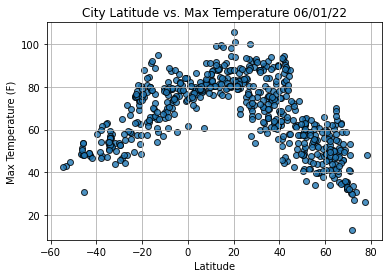

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

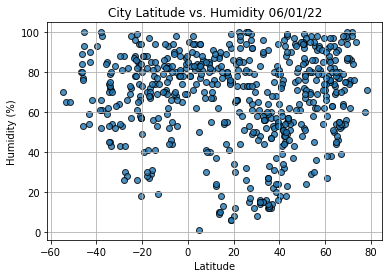

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


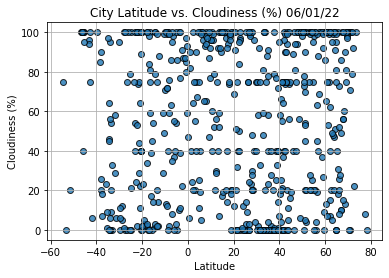

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()
